# Quantify the effect of GoalLeaning Heuristics

In this notebook, we try to quantify the effect of goal-leaning heuristic on the improvement in mission performance. Specifically, we try to calculate the expected reachability time (ERT), defined in this case as the average number of steps to reach a target, for both GoalLeaningES solver and BasicES solver. We support the results obtained in this study with visualizations of instances showing behavior of the agent leading to a near-optimal behavior.

The animate_simulation function below is different from the animate_simulation method available in SingleAgentEnv class. This function, defined in uuvmodel.py, returns the animation, state data, and energy data to help with creating static plots of events of interest. To create these plots, observe the animation below and note down the time steps for frames that one intends to see in the static plot. These time steps can be enteres in the visualize_snapshots function below which creates a figure with subplots showing all the snapshots. 

In [1]:
# setup the notebook
from fimdpenv import setup
setup()

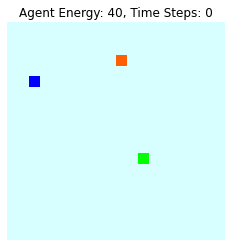

In [2]:
# create test environment
from uuvmodel import create_env
env_basic = create_env('1R-1T-simple', capacity=40)
env_glnotd = create_env('1R-1T-simple', capacity=40)
env_gltd = create_env('1R-1T-simple', capacity=40)
env_basic

## Comparison - BasicES, GoalLeaningES, and GoalLeaningES with threshold

In [3]:
# visualize BasicES and GoalLeaningES
from uuvmodel import animate_simulation, calc_exptimetotarget, visualize_multisnapshots
from fimdp.energy_solvers import GoalLeaningES, BasicES
from fimdp.objectives import AS_REACH, BUCHI, MIN_INIT_CONS, POS_REACH, SAFE

### BasicES

In [5]:
# BasicES
env_basic.create_counterstrategy(solver=BasicES, objective=BUCHI)
anim, im_basic, energy_basic = animate_simulation(env_basic, num_steps=50)
anim

As you can see in the above visualization, the solution obtained using BasicES, while acting safely, does not try to achieve the optimal path to the agent. Further, for the same reason, the expected reachability time cannot be calculated in this case.

### GoalLeaningES without Threshold

In [7]:
# GoalLeaningES without threshold
env_glnotd.create_counterstrategy(solver=GoalLeaningES, objective=BUCHI, threshold=0)
anim, im_glnotd, energy_glnotd = animate_simulation(env_glnotd, num_steps=60)
anim

The above animation shows the solution obtained using GoalLeaningES solver without a threshold (or equivalently a threshold of 0). Below, we see that the strategy obtained using this solver has an expected reachability time of about 60 time steps.

#### Expected time steps to target

In [9]:
calc_exptimetotarget(env_glnotd, num_runs=10000)

59.59

### GoalLeaningES with Threshold

In [12]:
# GoalLeaningES with threshold
env_gltd.create_counterstrategy(solver=GoalLeaningES, objective=BUCHI, threshold=0.7)
anim, im_gltd, energy_gltd = animate_simulation(env_gltd, num_steps=40)
anim

The the above animation, we observe a trajectory of an agent following a strategy obtained using the GoalLeaningES solver with a threshold. Clearly, the agent takes a near-optimal optimal path via the nearest reload state to reach the target. As a consequence, the expected reachability time is significantly lower in this case (about 26 time steps as seen below).

#### Expected time steps to target

In [15]:
calc_exptimetotarget(env_gltd, num_runs=10000)

26.0664

### Visualizing snapshots from different solvers

The code below uses the data obtained from different solves above and provides a snapshot comparing the agent behavior at different time instances for differeny energy-solvers. Users can specify the number of snapshots and the time instances at which the want the snapshots for different solvers.

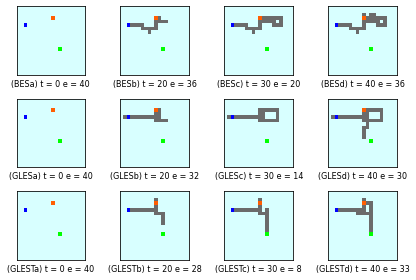

In [22]:
from uuvmodel import visualize_multisnapshots

im_history = [im_basic, im_glnotd, im_gltd]
energy_history = [energy_basic, energy_glnotd, energy_gltd]
snapshot_indices = [[0, 20, 30, 40],[0, 20, 30, 40],[0, 20, 30, 40]]
annotate_names = ['BES', 'GLES', 'GLEST']
visualize_multisnapshots(im_history, energy_history, snapshots_indices=snapshot_indices, annotate=True, annotate_names=annotate_names, filename='temp')